# Project Overview

**This project aims to develop a Quantitative Structure-Activity Relationship (QSAR) model to predict the LC50 value of chemical substances. LC50 represents the concentration of a compound that causes 50% lethality of fish in a test batch over 96 hours. Utilizing machine learning, we will develop an end-to-end automated model that leverages molecular descriptors to forecast LC50 values.**

**Key Objectives**

Develop QSAR models to predict LC50 values using machine learning.

Incorporate species and exposure routes as features to enhance model generalizability.

Implement a novel method for substituting taxonomic categories for species dummy variables.


**Dataset**

The dataset is sourced from the ECOTOX Database of the US Environmental Protection Agency, supplemented with additional data from ECHA. It includes in vivo test data on fish for hundreds of chemical substances.

This dataset was used to develop quantitative regression QSAR models to predict acute aquatic toxicity towards the fish Pimephales promelas (fathead minnow) on a set of 908 chemicals. LC50 data, which is the concentration that causes death in 50% of test fish over a test duration of 96 hours, was used as model response. The model comprised 6 molecular descriptors: MLOGP (molecular properties), CIC0 (information indices), GATS1i (2D autocorrelations), NdssC (atom-type counts), NdsCH ((atom-type counts), SM1_Dz(Z) (2D matrix-based descriptors). Details can be found in the quoted reference: M. Cassotti, D. Ballabio, R. Todeschini, V. Consonni. A similarity-based QSAR model for predicting acute toxicity towards the fathead minnow (Pimephales promelas), SAR and QSAR in Environmental Research (2015), 26, 217-243; doi: 10.1080/1062936X.2015.1018938



# CODE

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with appropriate delimiter and no header
df = pd.read_csv("C:/Users/Bharath/Downloads/qsar+fish+toxicity (2)/qsar_fish_toxicity.csv", delimiter=";", header=None)

# Assign column names
df.columns = ['MLOGP', 'CIC0', 'GATS1i', 'NdssC', 'NdsCH', 'SM1_Dz(Z)', 'LC50']

In [19]:
df.head()

,MLOGP,CIC0,GATS1i,NdssC,NdsCH,SM1_Dz(Z),LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MLOGP      908 non-null    float64
 1   CIC0       908 non-null    float64
 2   GATS1i     908 non-null    float64
 3   NdssC      908 non-null    int64  
 4   NdsCH      908 non-null    int64  
 5   SM1_Dz(Z)  908 non-null    float64
 6   LC50       908 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.8 KB


In [21]:
df.describe()

,MLOGP,CIC0,GATS1i,NdssC,NdsCH,SM1_Dz(Z),LC50
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


# EDA : Exploratory Data Analysis


Correlation matrix:
              MLOGP      CIC0    GATS1i     NdssC     NdsCH  SM1_Dz(Z)  \
MLOGP      1.000000 -0.235360  0.147622  0.121341  0.246639   0.463867   
CIC0      -0.235360  1.000000 -0.145967 -0.141401  0.163179   0.200663   
GATS1i     0.147622 -0.145967  1.000000 -0.010657  0.092410  -0.450739   
NdssC      0.121341 -0.141401 -0.010657  1.000000  0.188164   0.048620   
NdsCH      0.246639  0.163179  0.092410  0.188164  1.000000   0.028499   
SM1_Dz(Z)  0.463867  0.200663 -0.450739  0.048620  0.028499   1.000000   
LC50       0.291854  0.410893 -0.397965  0.172004  0.172390   0.651664   

               LC50  
MLOGP      0.291854  
CIC0       0.410893  
GATS1i    -0.397965  
NdssC      0.172004  
NdsCH      0.172390  
SM1_Dz(Z)  0.651664  
LC50       1.000000  


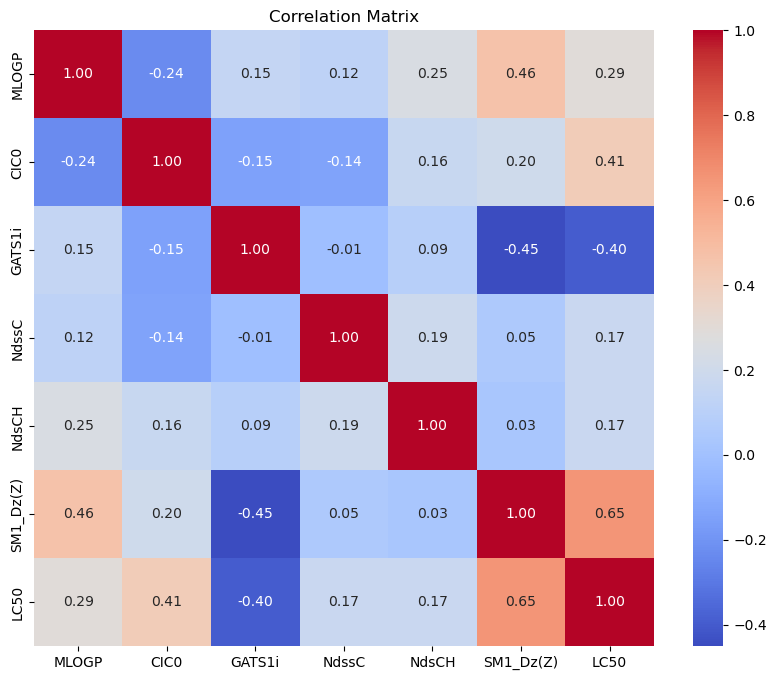

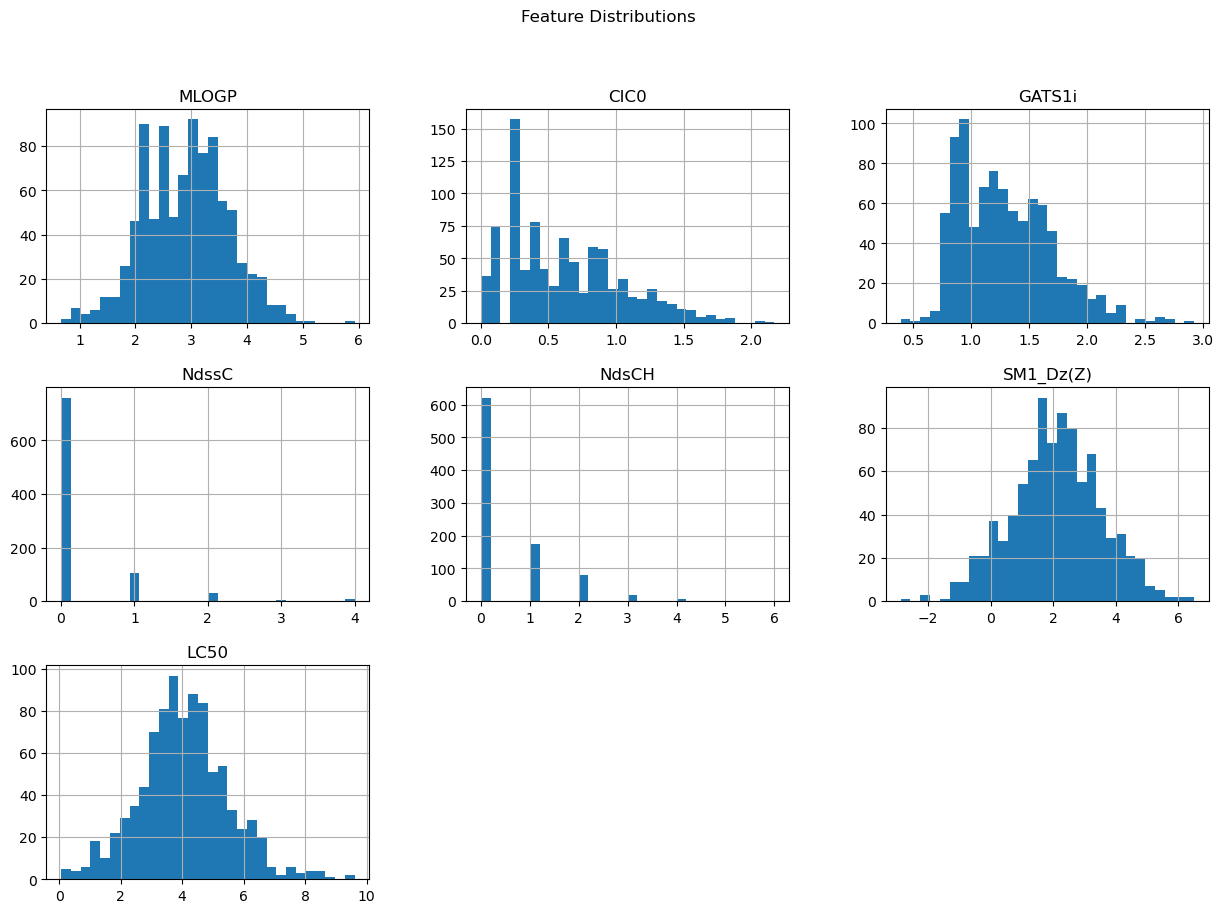

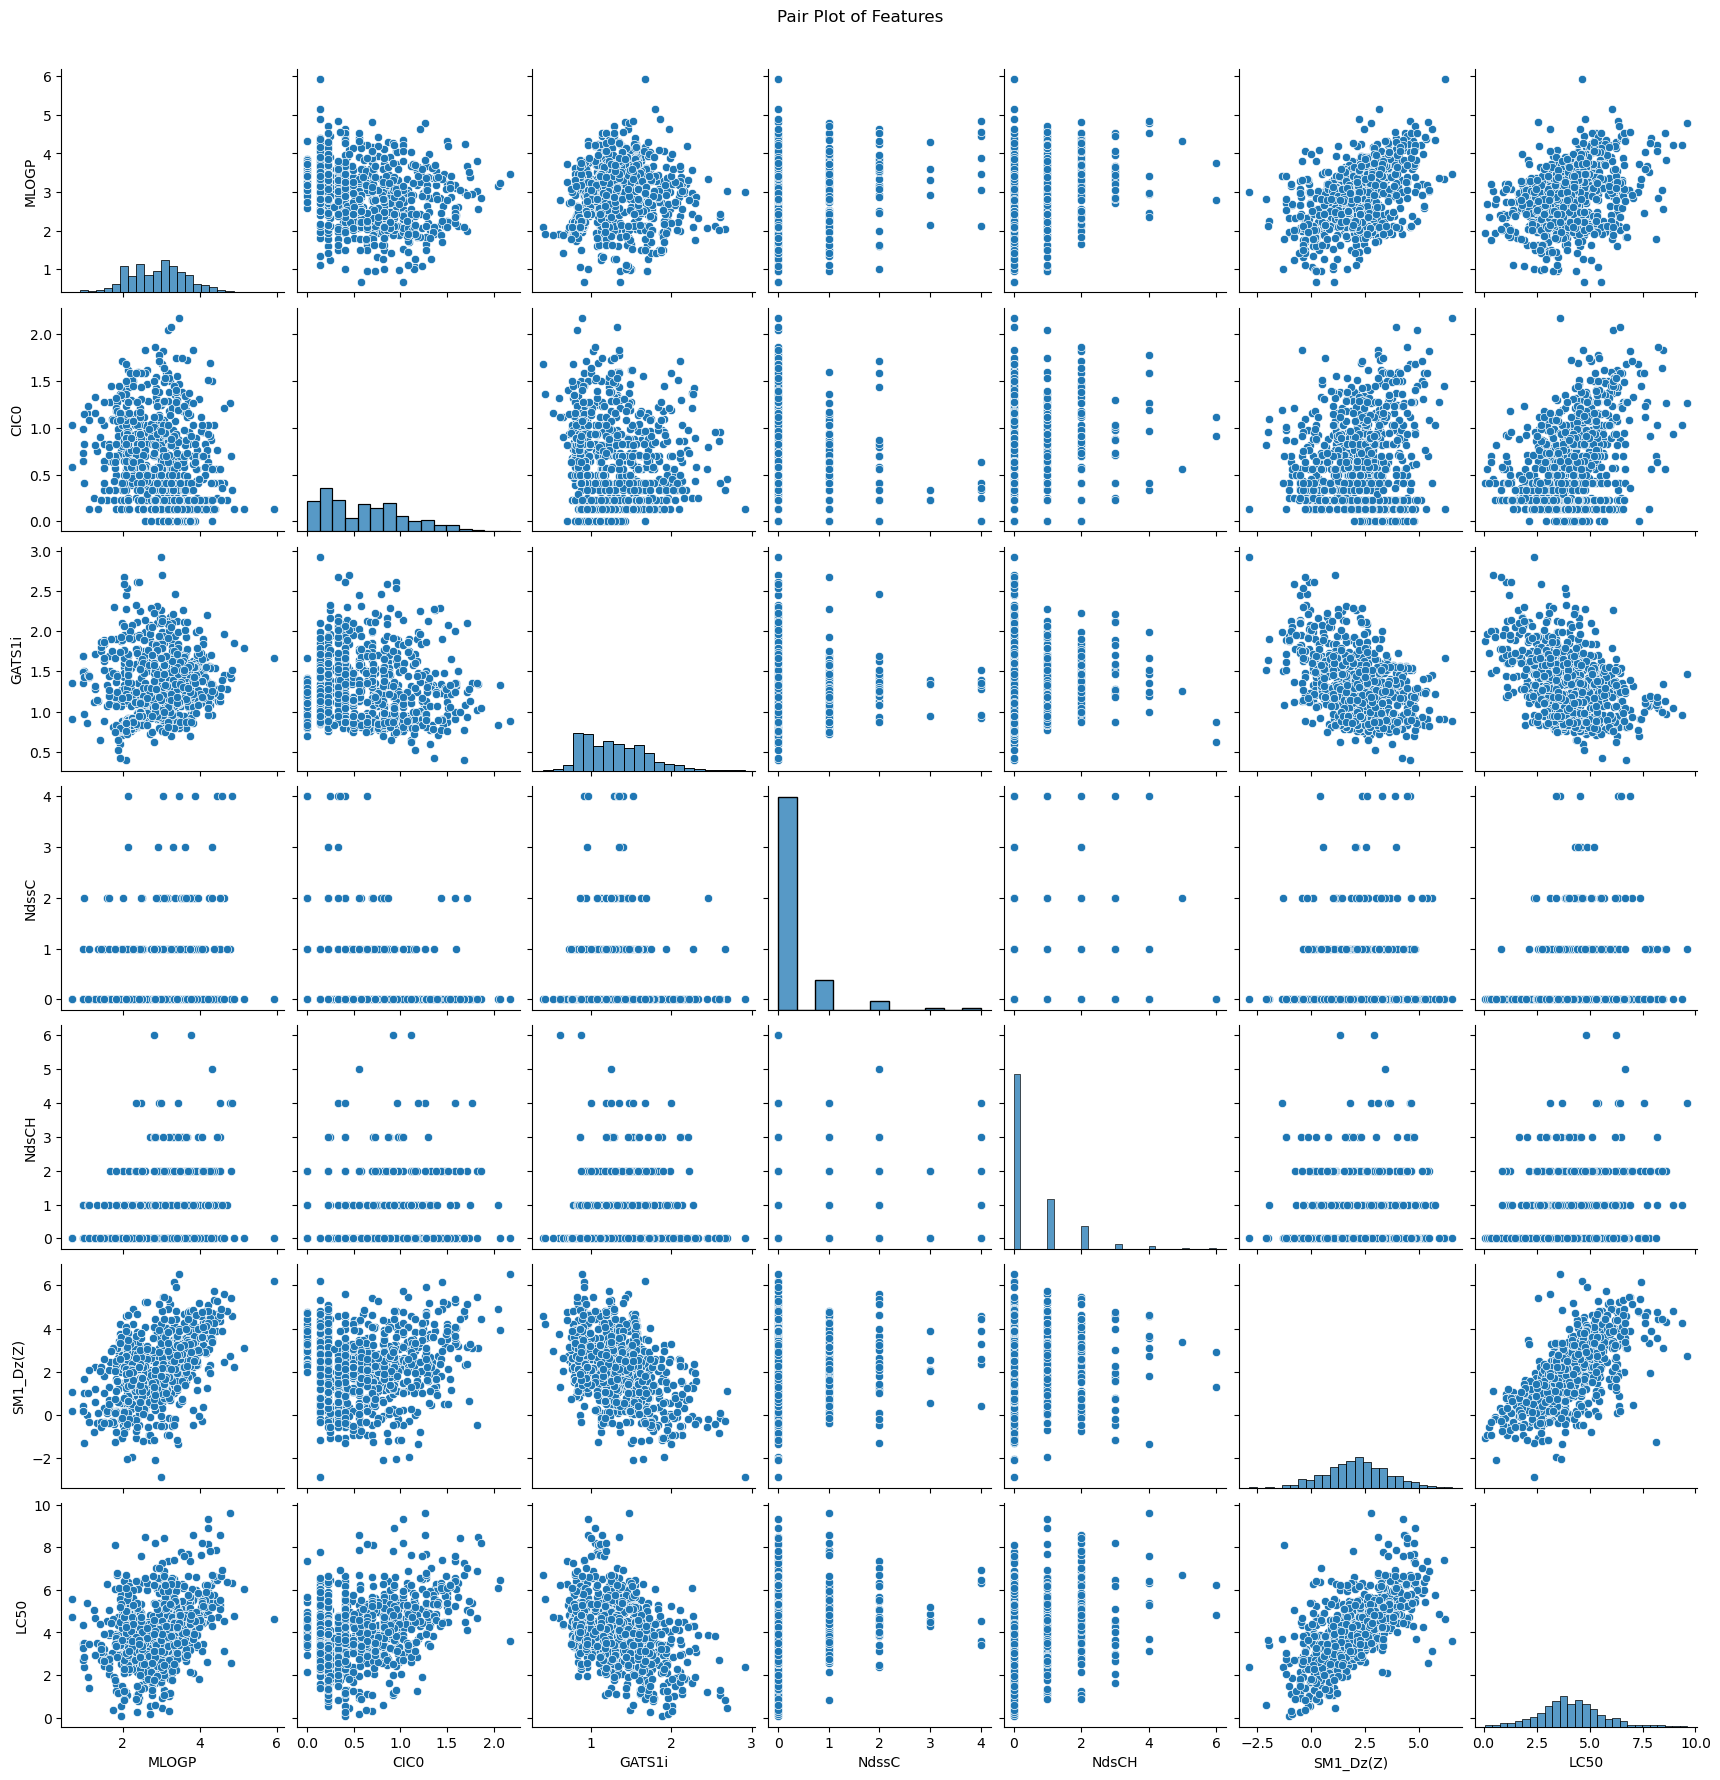

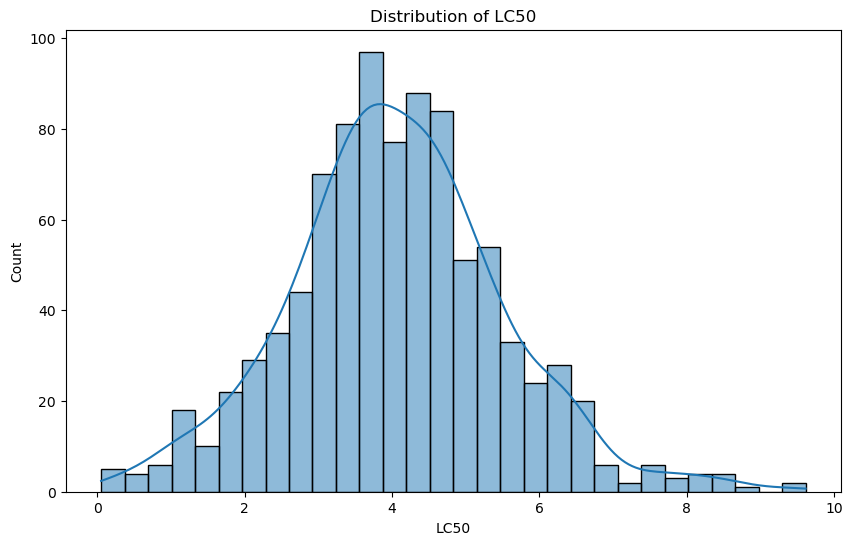

In [22]:
# Correlation matrix
correlation_matrix = df.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Distribution of each feature
df.hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Feature Distributions')
plt.show()

# Pair plot to visualize relationships between features
sns.pairplot(df)
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

# Target variable analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['LC50'], kde=True, bins=30)
plt.title('Distribution of LC50')
plt.show()

# Feature Scaling,Train-Test Split

In [23]:
X = df.drop('LC50',axis =1 )
y = df['LC50']

In [24]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size=0.2,random_state=10)

# Model Development

In [29]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Polynomial Regression': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Dictionary to store results
results = {
    'Model': [],
    'MSE': [],
    'R²': []
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R²'].append(r2)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print("Model Performance:")
print(results_df)


Model Performance:
                      Model       MSE        R²
0         Linear Regression  0.687198  0.608954
1          Ridge Regression  0.679756  0.613189
2          Lasso Regression  1.758523 -0.000678
3     Polynomial Regression  0.635307  0.638482
4             Decision Tree  1.272571  0.275850
5             Random Forest  0.598844  0.659231
6         Gradient Boosting  0.588742  0.664979
7  Support Vector Regressor  0.569767  0.675777
8       K-Nearest Neighbors  0.619652  0.647390


In [30]:
results_df

,Model,MSE,R²
0,Linear Regression,0.687198,0.608954
1,Ridge Regression,0.679756,0.613189
2,Lasso Regression,1.758523,-0.000678
3,Polynomial Regression,0.635307,0.638482
4,Decision Tree,1.272571,0.275850
5,Random Forest,0.598844,0.659231
6,Gradient Boosting,0.588742,0.664979
7,Support Vector Regressor,0.569767,0.675777
8,K-Nearest Neighbors,0.619652,0.647390


### Conclusion

After evaluating multiple regression models for predicting LC50 values using QSAR modeling techniques, it was found that the **Support Vector Regressor (SVR) performed the best, achieving the lowest Mean Squared Error (MSE) of 0.569767 and the highest R² value of 0.675777. This indicates that the SVR model has the highest accuracy and explanatory power among the tested models. Gradient Boosting Regressor (GBR) also showed strong performance, with an MSE of 0.588742 and an R² of 0.664979, closely following SVR. The Random Forest Regressor (RF) demonstrated solid performance as well, with an MSE of 0.598844 and an R² of 0.659231.** These three models significantly outperformed simpler models like Linear Regression and Decision Trees.

Given the strong individual performance of SVR, GBR, and RF, an effective strategy to enhance predictive accuracy **further could be to construct a tri-model ensemble.** By integrating the predictions of Random Forest, Support Vector Regressor, and Gradient Boosting Regressor, we can leverage the strengths of each model, potentially improving overall model robustness and predictive performance.

In [37]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pickle

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Train Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Train Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# Save the models
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('svr_model.pkl', 'wb') as f:
    pickle.dump(svr_model, f)

with open('gbr_model.pkl', 'wb') as f:
    pickle.dump(gbr_model, f)

# Make predictions with each model
rf_preds = rf_model.predict(X_test)
svr_preds = svr_model.predict(X_test)
gbr_preds = gbr_model.predict(X_test)

# Combine predictions using averaging
ensemble_preds = (rf_preds + svr_preds + gbr_preds) / 3

# Evaluate the ensemble model
ensemble_mse = mean_squared_error(y_test, ensemble_preds)
ensemble_r2 = r2_score(y_test, ensemble_preds)

print("Ensemble Model Performance:")
print(f"MSE: {ensemble_mse}")
print(f"R²: {ensemble_r2}")

# Save ensemble predictions
with open('ensemble_preds.pkl', 'wb') as f:
    pickle.dump(ensemble_preds, f)


Ensemble Model Performance:
MSE: 0.54161179581242
R²: 0.6917986759520705
